In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('Dhaka home price.csv')

In [4]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [7]:
df.shape


(58, 2)

In [8]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [9]:
df.isnull().any()

area    False
rent    False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    58 non-null     int64
 1   rent    58 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


In [13]:
df[['rent']].head()


,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [14]:
df['area'].head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

Text(0.5, 1.0, 'Dhaka home price prediction')

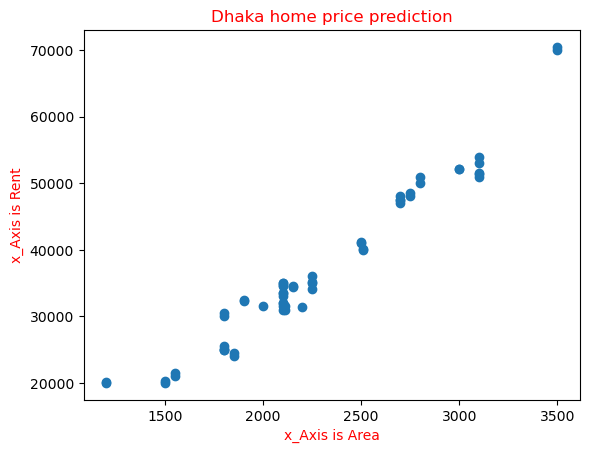

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df[['area']],df['rent'])
plt.xlabel('x_Axis is Area',color='red')
plt.ylabel('x_Axis is Rent',color='red')
plt.title('Dhaka home price prediction',color='red')

In [22]:
x=df.drop('rent',axis=1)
y=df.drop('area',axis=1)

# Linear_regression step 01

In [25]:
# manually
x.mean()

area    2276.551724
dtype: float64

In [26]:
y.mean()

rent    37120.517241
dtype: float64

# mean with library

In [27]:
import numpy as np


In [28]:
np.mean(x)

2276.551724137931

In [29]:
np.mean(y)

37120.51724137931

In [30]:
dev_x=x-x.mean()

In [31]:
dev_y=y-y.mean()

In [32]:
dev_x.head()

,area
0,-276.551724
1,-176.551724
2,223.448276
3,-26.551724
4,723.448276


In [33]:
dev_y.head()

,rent
0,-5620.517241
1,-2120.517241
2,3929.482759
3,-1020.517241
4,14979.482759


In [35]:
# copy from another m=np.sum(dev_x*dev_y)/np.sum(dev_x**2)
slope=np.sum(dev_x*dev_y)/np.sum(dev_x**2)


In [36]:
slope

area    0.0
rent    NaN
dtype: float64

# Linear_regression with by library in python

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
#object difine
reg=LinearRegression()

In [41]:
reg.fit(x,y)

LinearRegression()

In [42]:
reg.coef_

array([[21.42189032]])

In [43]:
reg.intercept_

array([-11647.5241024])

In [44]:
m=reg.coef_
c=reg.intercept_
m*2200+c

array([[35480.63460304]])

In [45]:
reg.predict([[2200]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[35480.63460304]])

In [47]:
df['predicted rent']=reg.predict(x)


In [49]:
df.head()

,area,rent,predicted rent
0,2000,31500,31196.256539
1,2100,35000,33338.445571
2,2500,41050,41907.201699
3,2250,36100,36551.729119
4,3000,52100,52618.146860


In [52]:
#residuals or loss  or error
df['residuals']=df['rent']-df['predicted rent']

In [53]:
df.head()

,area,rent,predicted rent,residuals
0,2000,31500,31196.256539,303.743461
1,2100,35000,33338.445571,1661.554429
2,2500,41050,41907.201699,-857.201699
3,2250,36100,36551.729119,-451.729119
4,3000,52100,52618.146860,-518.146860


# MSE < mean_squared_error

In [61]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(df['rent'],df['predicted rent'])

In [63]:
mse

6593919.443513392

# MAE< mean_absolute_error

In [64]:
from sklearn.metrics import mean_absolute_error


In [65]:
mae=mean_squared_error(df['rent'],df['predicted rent'])

In [66]:
mae

6593919.443513392

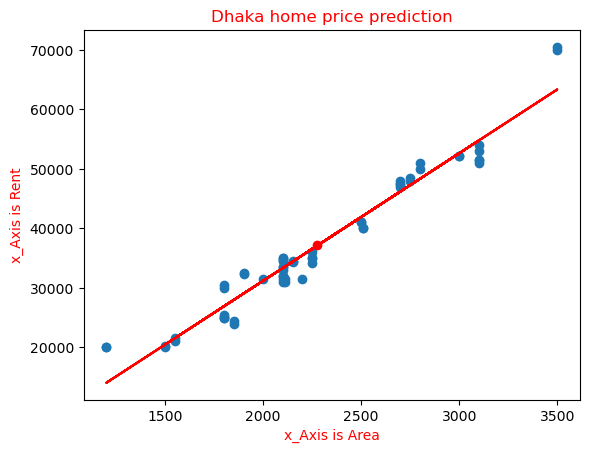

In [71]:
#Best fit line  count
plt.plot(x,df['predicted rent'],color='red')
plt.scatter(df[['area']],df['rent'])
plt.xlabel('x_Axis is Area',color='red')
plt.ylabel('x_Axis is Rent',color='red')
plt.title('Dhaka home price prediction',color='red')

plt.scatter( np.mean(x),np.mean(y),color='red',marker='o')
